# WaSH Exposure
http://apps.who.int/gho/data/node.main.46?lang=en

In [607]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

## Base 1 : Accès à des services d'assainissements.
<p><br\>

In [608]:
df_del = pd.read_csv("data/sanitation.csv")
df_del.head()

,Unnamed: 0,2015,2015.1,2015.2,2015.3,2015.4,2015.5,2014,2014.1,2014.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
0,NaN,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,...,Population using at least basic sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...
1,Country,Rural,Urban,Total,Rural,Urban,Total,Rural,Urban,Total,...,Total,Rural,Urban,Total,Rural,Urban,Total,Rural,Urban,Total
2,Afghanistan,33,56,39,NaN,NaN,NaN,32,55,38,...,24,NaN,NaN,NaN,22,31,24,NaN,NaN,NaN
3,Albania,97,98,98,64,65,65,97,98,98,...,89,49,64,55,82,97,88,48,64,55
4,Algeria,82,90,87,24,17,19,82,90,87,...,84,24,19,21,72,91,84,24,19,21


In [609]:
df = pd.DataFrame()

df['Country'] = df_del['Unnamed: 0']
df["Sanitation_2015_Rural"] = df_del['2015']
df["Sanitation_2015_Urban"] = df_del['2015.1']
df["Sanitation_2015_Total"] = df_del['2015.2']
df["Safe_San_2015_Rural"] = df_del['2015.3']
df["Safe_San_2015_Urban"] = df_del['2015.4']
df["Safe_San_2015_Total"] = df_del['2015.5']
df = df.drop([0,1,2])

df.reset_index(drop = True, inplace = True)

df.head()

,Country,Sanitation_2015_Rural,Sanitation_2015_Urban,Sanitation_2015_Total,Safe_San_2015_Rural,Safe_San_2015_Urban,Safe_San_2015_Total
0,Albania,97,98,98,64,65,65
1,Algeria,82,90,87,24,17,19
2,Andorra,100,100,100,100,100,100
3,Angola,21,62,39,NaN,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,88,NaN,NaN,NaN


In [610]:
print("Nombre de pays :",len(df))
print("\nNombre de valeurs manquantes :\n")
print(df.isna().sum())

Nombre de pays : 193

Nombre de valeurs manquantes :

Country                    0
Sanitation_2015_Rural     26
Sanitation_2015_Urban     23
Sanitation_2015_Total      2
Safe_San_2015_Rural      161
Safe_San_2015_Urban      127
Safe_San_2015_Total      115
dtype: int64


On s'interessse principalement à la population totale des pays d'Asie utilisant des services d'assainissement basiques. (Sanitation_2015)

### Concentration sur l'Asie

In [611]:
asia = ['Bangladesh','Bhutan','Brunei Darussalam','Cambodia','China',"Democratic People's Republic of Korea"
        ,'India','Indonesia','Japan',"Lao People's Democratic Republic",'Malaysia','Mongolia',"Myanmar",'Nepal'
        ,"Philippines",'Republic of Korea','Singapore','Sri Lanka','Thailand','Viet Nam']

### Réagencement des données

In [612]:
dfn = pd.DataFrame(df)
dfn.head()
for i in dfn.index:
    if(dfn["Country"][i] not in asia):
        dfn.drop([i],inplace=True)

dfn['Country'].loc[dfn['Country'] == "Lao People's Democratic Republic"] = 'Laos'
dfn['Country'].loc[dfn['Country'] == "Democratic People's Republic of Korea"] = 'North Korea'
dfn['Country'].loc[dfn['Country'] == "Brunei Darussalam"] = 'Brunei'

dfn.reset_index(drop=True,inplace=True)
dfn.fillna(-1,inplace=True)
dfn.head()

,Country,Sanitation_2015_Rural,Sanitation_2015_Urban,Sanitation_2015_Total,Safe_San_2015_Rural,Safe_San_2015_Urban,Safe_San_2015_Total
0,Bangladesh,43,54,47,32,-1,-1
1,Bhutan,57,72,63,-1,-1,-1
2,Brunei,97,96,96,-1,-1,-1
3,Cambodia,39,88,49,-1,-1,-1
4,China,61,86,75,42,73,60


In [613]:
dfn['Sanitation_2015_Total'] = pd.to_numeric(dfn["Sanitation_2015_Total"])
dfn['Sanitation_2015_Total'].fillna(-1,inplace = True)

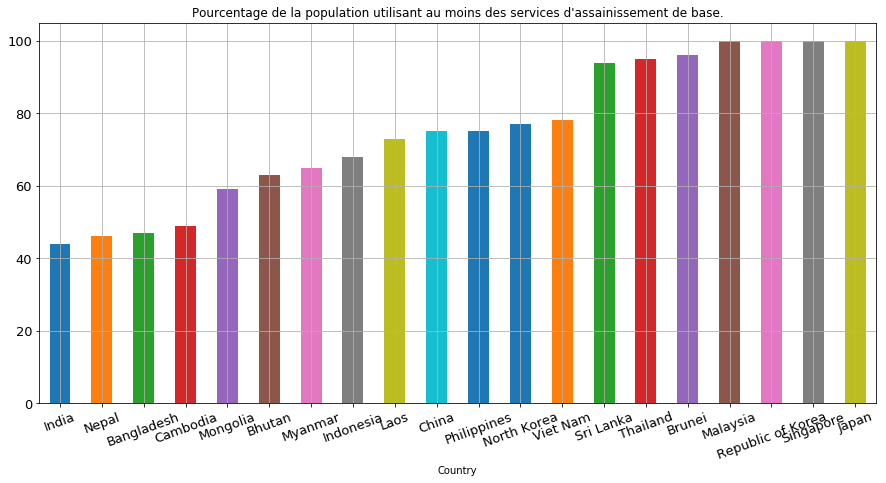

In [614]:
dfn.sort_values(by='Sanitation_2015_Total').plot.bar(x='Country',y='Sanitation_2015_Total'
                                    ,figsize=(15,7)
                                    ,fontsize=13
                                    ,title="Pourcentage de la population utilisant au moins des services d'assainissement de base."
                                    ,legend = False
                                    ,grid = True
                                    ,rot = 20
                                    )

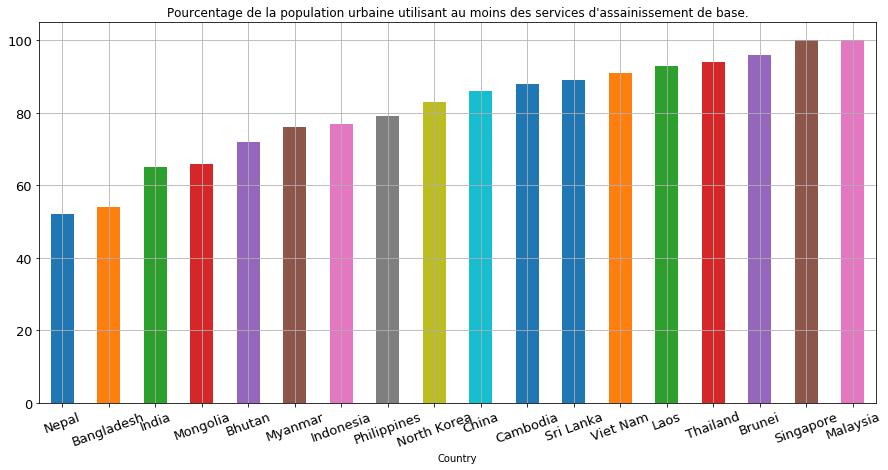

In [615]:
dfn['Sanitation_2015_Urban'] = pd.to_numeric(dfn['Sanitation_2015_Urban'])

dfn[dfn['Sanitation_2015_Urban']>0].sort_values(by='Sanitation_2015_Urban').plot.bar(x='Country',y='Sanitation_2015_Urban'
                                    ,figsize=(15,7)
                                    ,fontsize=13
                                    ,title="Pourcentage de la population urbaine utilisant au moins des services d'assainissement de base."
                                    ,legend = False
                                    ,grid = True
                                    ,rot = 20
                                    )

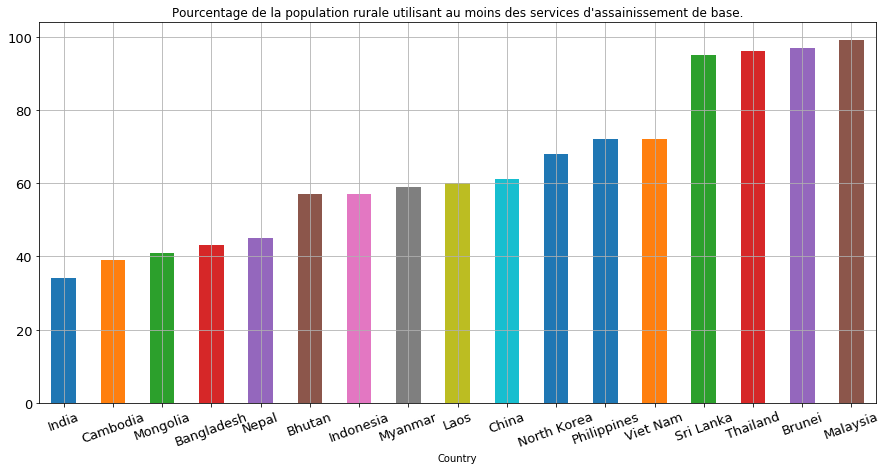

In [616]:
dfn['Sanitation_2015_Rural'] = pd.to_numeric(dfn['Sanitation_2015_Rural'])
dfn[dfn['Sanitation_2015_Rural']>0].sort_values(by='Sanitation_2015_Rural').plot.bar(x='Country',y='Sanitation_2015_Rural'
                                    ,figsize=(15,7)
                                    ,fontsize=13
                                    ,title="Pourcentage de la population rurale utilisant au moins des services d'assainissement de base."
                                    ,legend = False
                                    ,grid = True
                                    ,rot = 20
                                    )

### Évolution de l'accès à l'assainissement

In [641]:
df_e = pd.DataFrame()
years = [str(date) for date in range(2005,2016)]

df_e['Country'] = df_del['Unnamed: 0']

for date in years: 
    df_e["Sanitation_"+date+"_Total"] = df_del[date]
    
df_e.drop([0,1],inplace=True)
df_e.reset_index(drop=True,inplace=True)
df_e.fillna(-1,inplace=True)
df_e.head()

,Country,Sanitation_2005_Total,Sanitation_2006_Total,Sanitation_2007_Total,Sanitation_2008_Total,Sanitation_2009_Total,Sanitation_2010_Total,Sanitation_2011_Total,Sanitation_2012_Total,Sanitation_2013_Total,Sanitation_2014_Total,Sanitation_2015_Total
0,Afghanistan,25,26,27,27,28,29,30,31,31,32,33
1,Albania,88,89,90,91,92,93,94,95,96,97,97
2,Algeria,76,76,77,78,78,79,80,80,81,82,82
3,Andorra,100,100,100,100,100,100,100,100,100,100,100
4,Angola,12,13,14,15,16,17,18,19,20,20,21


In [642]:
for i in df_e.index:  
    if(df_e["Country"][i] not in asia or int(df_e['Sanitation_2015_Total'][i]) > 70):
        df_e.drop([i],inplace=True)

df_e['Country'].loc[df_e['Country'] == "Lao People's Democratic Republic"] = 'Laos'
df_e['Country'].loc[df_e['Country'] == "Democratic People's Republic of Korea"] = 'North Korea'

df_e.reset_index(drop=True,inplace=True)
df_e.head()

,Country,Sanitation_2005_Total,Sanitation_2006_Total,Sanitation_2007_Total,Sanitation_2008_Total,Sanitation_2009_Total,Sanitation_2010_Total,Sanitation_2011_Total,Sanitation_2012_Total,Sanitation_2013_Total,Sanitation_2014_Total,Sanitation_2015_Total
0,Bangladesh,28,30,31,33,34,36,37,39,40,42,43
1,Bhutan,49,50,51,51,52,53,54,55,55,56,57
2,Cambodia,15,18,20,22,25,27,29,32,34,36,39
3,China,54,55,56,56,57,58,58,59,60,60,61
4,North Korea,68,68,68,68,68,68,68,68,68,68,68


In [643]:
countries = df_e['Country']
values_total = []

for c in countries:
    l_total = []
    for date in years:
        l_total.append(int(df_e[df_e['Country'] == c]['Sanitation_'+date+'_Total']))
    values_total.append(l_total)  
                         

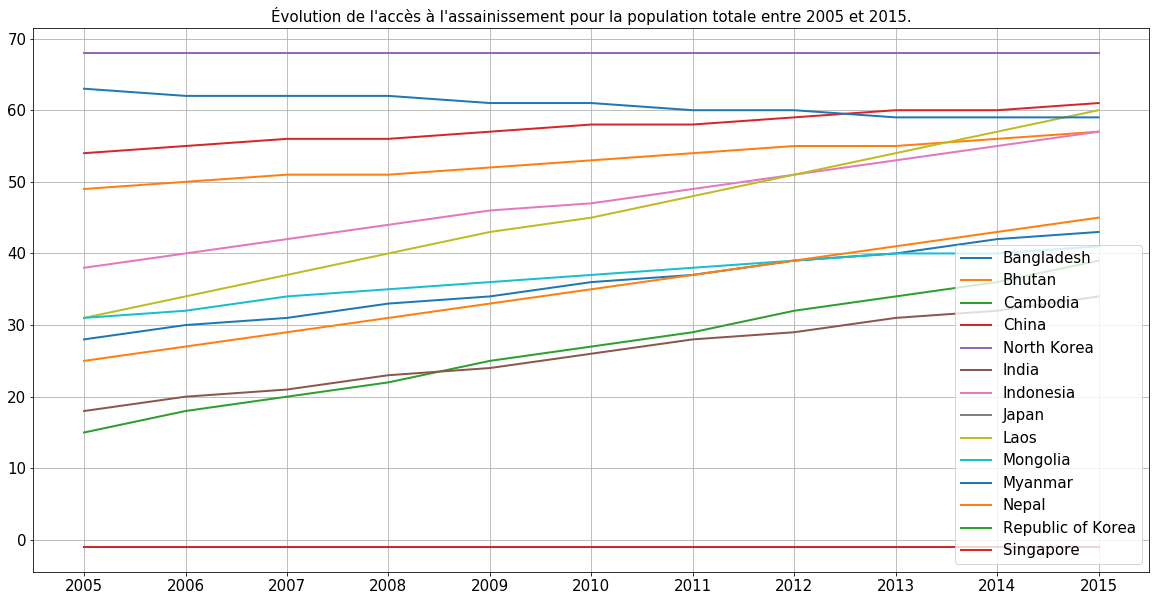

In [644]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(20,10)

for i in range(len(countries)):
    ax1.plot(years,values_total[i], lw=2, label=countries[i])
ax1.legend(loc='lower right', fancybox=True, shadow=False,fontsize=15)
ax1.set_title("Évolution de l'accès à l'assainissement pour la population totale entre 2005 et 2015.",size=15)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.grid(True)

## Base 2 : Water drinking services
<p><br\>

In [621]:
df1 = pd.read_csv("data/water_services.csv")
df1.head()

,Unnamed: 0,2015,2015.1,2015.2,2015.3,2015.4,2015.5,2014,2014.1,2014.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
0,NaN,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,...,Population using at least basic drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...
1,Country,Rural,Urban,Total,Rural,Urban,Total,Rural,Urban,Total,...,Total,Rural,Urban,Total,Rural,Urban,Total,Rural,Urban,Total
2,Afghanistan,53,89,63,NaN,NaN,NaN,51,86,60,...,27,NaN,NaN,NaN,21,50,27,NaN,NaN,NaN
3,Albania,90,93,91,NaN,NaN,69,90,93,91,...,88,NaN,NaN,45,82,96,88,NaN,NaN,43
4,Algeria,89,95,93,NaN,NaN,NaN,88,95,93,...,90,NaN,NaN,NaN,83,94,90,NaN,NaN,NaN


In [622]:
df1 = pd.DataFrame()

df1['Country'] = df_del['Unnamed: 0']
df1["DW_2015_Rural"] = df1_d['2015']
df1["DW_2015_Urban"] = df1_d['2015.1']
df1["DW_2015_Total"] = df1_d['2015.2']
df1 = df1.drop([0,1,2])

df1.reset_index(drop = True, inplace = True)

df1.head()

,Country,DW_2015_Rural,DW_2015_Urban,DW_2015_Total
0,Albania,90,93,91
1,Algeria,89,95,93
2,Andorra,100,100,100
3,Angola,23,63,41
4,Antigua and Barbuda,NaN,NaN,97


In [623]:
df1['DW_2015_Total'].fillna(-1,inplace = True)
df1['DW_2015_Total'] = pd.to_numeric(df1["DW_2015_Total"])

In [624]:
dfn1 = pd.DataFrame(df1)
dfn1.head()
for i in dfn1.index:
    if(dfn1["Country"][i] not in asia):
        dfn1.drop([i],inplace=True)

dfn1['Country'].loc[dfn1['Country'] == "Lao People's Democratic Republic"] = 'Laos'
dfn1['Country'].loc[dfn1['Country'] == "Democratic People's Republic of Korea"] = 'North Korea'
dfn1['Country'].loc[dfn1['Country'] == "Brunei Darussalam"] = 'Brunei'

dfn1.reset_index(drop=True,inplace=True)
dfn1.fillna(-1,inplace=True)
dfn1.head()

,Country,DW_2015_Rural,DW_2015_Urban,DW_2015_Total
0,Bangladesh,97,98,97
1,Bhutan,98,97,98
2,Brunei,99,100,100
3,Cambodia,70,96,75
4,China,96,96,96


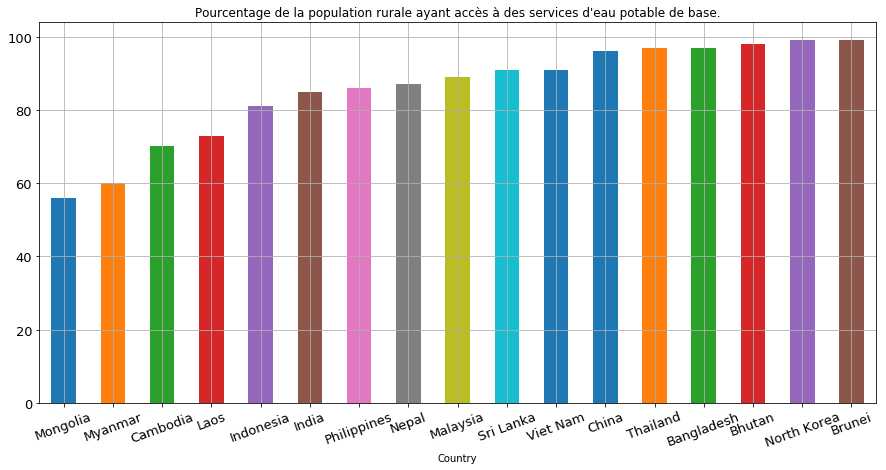

In [625]:
dfn1['DW_2015_Rural'] = pd.to_numeric(dfn1['DW_2015_Rural'])
dfn1[dfn1['DW_2015_Rural'] > 0].sort_values(by='DW_2015_Rural').plot.bar(x='Country',y='DW_2015_Rural'
                                    ,figsize=(15,7)
                                    ,fontsize=13
                                    ,title="Pourcentage de la population rurale ayant accès à des services d'eau potable de base."
                                    ,legend = False
                                    ,grid = True
                                    ,rot = 20
                                    )

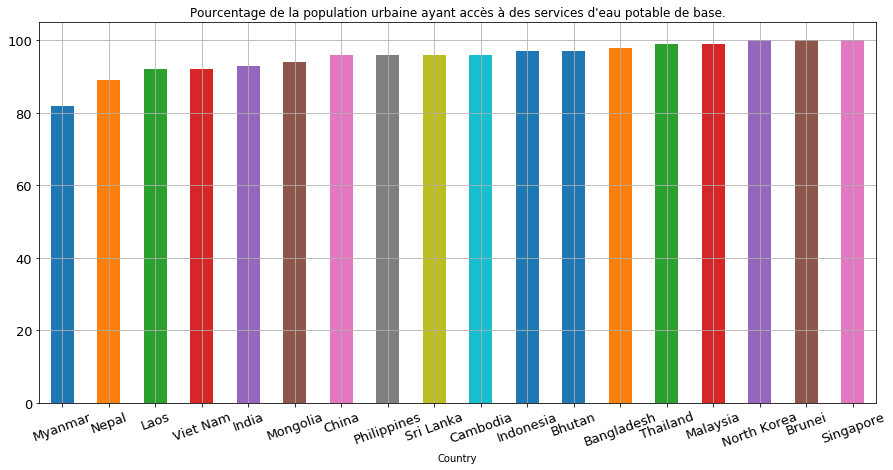

In [626]:
dfn1['DW_2015_Urban'] = pd.to_numeric(dfn1['DW_2015_Urban'])
dfn1[dfn1['DW_2015_Urban'] > 0].sort_values(by='DW_2015_Urban').plot.bar(x='Country',y='DW_2015_Urban'
                                    ,figsize=(15,7)
                                    ,fontsize=13
                                    ,title="Pourcentage de la population urbaine ayant accès à des services d'eau potable de base."
                                    ,legend = False
                                    ,grid = True
                                    ,rot = 20
                                    )

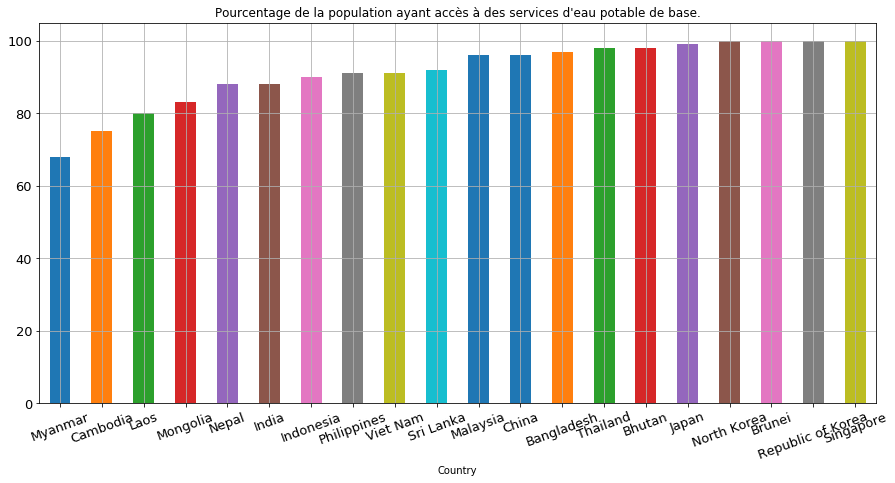

In [627]:
dfn1['DW_2015_Total'] = pd.to_numeric(dfn1['DW_2015_Total'])
dfn1.sort_values(by='DW_2015_Total').plot.bar(x='Country',y='DW_2015_Total'
                                    ,figsize=(15,7)
                                    ,fontsize=13
                                    ,title="Pourcentage de la population ayant accès à des services d'eau potable de base."
                                    ,legend = False
                                    ,grid = True
                                    ,rot = 20
                                    )

### Évolution de l'accès à l'eau potable

In [628]:
dfe_1 = pd.read_csv("data/water_services.csv")
df_eDW = pd.DataFrame()

df_eDW['Country'] = dfe_1['Unnamed: 0']

for date in years: 
    df_eDW["DW_"+date+"_Total"] = dfe_1[date]
    
df_eDW.drop([0,1,2],inplace=True)
df_eDW.reset_index(drop=True,inplace=True)
df_eDW.fillna(-1,inplace=True)
df_eDW.head()

,Country,DW_2005_Total,DW_2006_Total,DW_2007_Total,DW_2008_Total,DW_2009_Total,DW_2010_Total,DW_2011_Total,DW_2012_Total,DW_2013_Total,DW_2014_Total,DW_2015_Total
0,Albania,82,82,82,82,82,82,82,83,86,90,90
1,Algeria,85,85,86,86,87,87,87,88,88,88,89
2,Andorra,100,100,100,100,100,100,100,100,100,100,100
3,Angola,24,24,24,24,24,24,24,24,24,24,23
4,Antigua and Barbuda,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [629]:
for i in df_eDW.index:  
    if(df_eDW["Country"][i] not in asia) or int(df_eDW['DW_2015_Total'][i]) > 70 or int(df_eDW['DW_2015_Total'][i]) <= -1 :
        df_eDW.drop([i],inplace=True)

        

df_eDW['Country'].loc[df_eDW['Country'] == "Lao People's Democratic Republic"] = 'Laos'
df_eDW['Country'].loc[df_eDW['Country'] == "Democratic People's Republic of Korea"] = 'North Korea'

df_eDW.reset_index(drop=True,inplace=True)
df_eDW.head()


,Country,DW_2005_Total,DW_2006_Total,DW_2007_Total,DW_2008_Total,DW_2009_Total,DW_2010_Total,DW_2011_Total,DW_2012_Total,DW_2013_Total,DW_2014_Total,DW_2015_Total
0,Cambodia,55,56,58,59,61,62,64,65,67,68,70
1,Mongolia,40,42,43,45,47,48,50,52,53,55,56
2,Myanmar,51,52,53,54,55,56,57,57,58,59,60


In [630]:
countries = df_eDW['Country']
values_totalDW = []
for c in countries:
    l_total = []
    for date in years:
        l_total.append(int(df_eDW[df_eDW['Country'] == c]['DW_'+date+'_Total']))
    values_totalDW.append(l_total)           

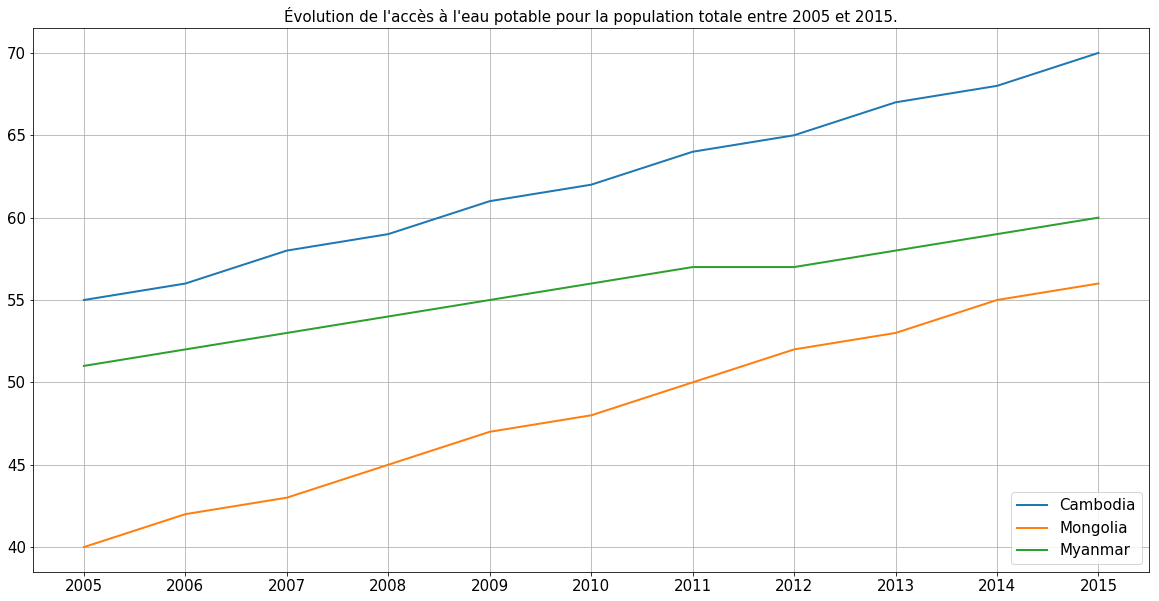

In [631]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

for i in range(len(countries)):
    ax.plot(years,values_totalDW[i], lw=2, label=countries[i])
ax.legend(loc='lower right', fancybox=True, shadow=False,fontsize=15)
ax.set_title("Évolution de l'accès à l'eau potable pour la population totale entre 2005 et 2015.",size=15)
plt.xticks(size=15)
plt.yticks(size=15)
ax.grid(True)

## Base 3 : Open Defecation
<p><br\>

In [632]:
df3_1 = pd.read_csv("data/open_defecation.csv")
df3_1.head()

,Unnamed: 0,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,2013.1,2013.2,...,2003.2,2002,2002.1,2002.2,2001,2001.1,2001.2,2000,2000.1,2000.2
0,NaN,Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),...,Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%),Population practising open defecation (%)
1,Country,Rural,Urban,Total,Rural,Urban,Total,Rural,Urban,Total,...,Total,Rural,Urban,Total,Rural,Urban,Total,Rural,Urban,Total
2,Afghanistan,18,0,14,19,0,14,20,0,15,...,25,31,7,25,32,8,26,32,8,26
3,Albania,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,1,0,1
4,Algeria,2,0,1,3,0,1,4,0,1,...,5,13,1,5,14,1,6,15,1,6


### Réagencement des données

In [633]:
df3_2 = pd.DataFrame()

df3_2['Country'] = df3_1['Unnamed: 0']
df3_2["OD_2015_Rural"] = df3_1['2015']
df3_2["OD_2015_Urban"] = df3_1['2015.1']
df3_2["OD_2015_Total"] = df3_1['2015.2']
df3_2 = df3_2.drop([0,1,2])

df3_2.reset_index(drop = True, inplace = True)

df3_2.head()

,Country,OD_2015_Rural,OD_2015_Urban,OD_2015_Total
0,Albania,0,0,0
1,Algeria,2,0,1
2,Andorra,0,0,0
3,Angola,56,3,33
4,Antigua and Barbuda,NaN,NaN,0


### Concentration sur l'Asie

In [634]:
df3 = pd.DataFrame(df3_2)
df3.head()
for i in df3.index:
    if(df3["Country"][i] not in asia):
        df3.drop([i],inplace=True)
        
df3['Country'].loc[df3['Country'] == "Lao People's Democratic Republic"] = 'Laos'
df3['Country'].loc[df3['Country'] == "Democratic People's Republic of Korea"] = 'North Korea'
df3['Country'].loc[df3['Country'] == "Brunei Darussalam"] = 'Brunei'


df3.reset_index(drop=True,inplace=True)
df3.fillna(-1,inplace=True)
df3.head()

,Country,OD_2015_Rural,OD_2015_Urban,OD_2015_Total
0,Bangladesh,0,0,0
1,Bhutan,0,0,0
2,Brunei,1,3,3
3,Cambodia,51,3,41
4,China,3,1,2


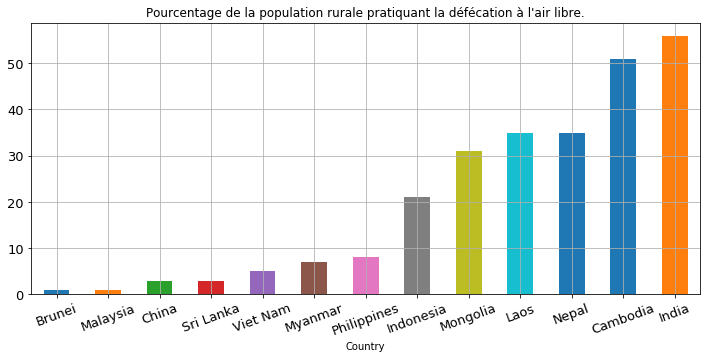

In [635]:
df3['OD_2015_Rural'] = pd.to_numeric(df3['OD_2015_Rural'])
df3[df3['OD_2015_Rural'] > 0].sort_values(by='OD_2015_Rural').plot.bar(x='Country',y='OD_2015_Rural'
                                    ,figsize=(12,5)
                                    ,fontsize=13
                                    ,title="Pourcentage de la population rurale pratiquant la défécation à l'air libre."
                                    ,legend = False
                                    ,grid = True
                                    ,rot = 20
                                    )

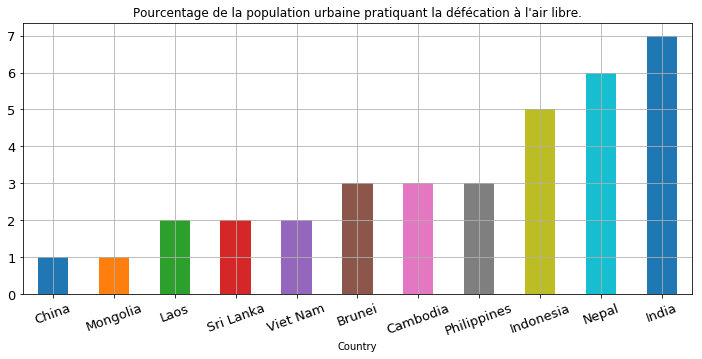

In [636]:
df3['OD_2015_Urban'] = pd.to_numeric(df3['OD_2015_Urban'])
df3[df3['OD_2015_Urban'] > 0].sort_values(by='OD_2015_Urban').plot.bar(x='Country',y='OD_2015_Urban'
                                    ,figsize=(12,5)
                                    ,fontsize=13
                                    ,title="Pourcentage de la population urbaine pratiquant la défécation à l'air libre."
                                    ,legend = False
                                    ,grid = True
                                    ,rot = 20
                                    )